In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

In this tutorial we will compute the diffusion coefficients of the water system at the superionic region. We choose 4 temperatures: **1000 K, 1200 K, 1250 K, and 1800 K**. The pressures are all **30 GPa**. 

# Method 1: Mean Squared Displacement Approach
The diffusion coefficient of a system can be computed from the slop of the mean squared displacement as a function of time:
$$D=\frac{1}{6}\frac{\mathrm{d}}{\mathrm{d}t}\langle\frac{1}{N}\sum_{i=1}^{N}(\bf{r}_i(t)-\bf{r}_i(0))^2\rangle$$
where $N$ is the number of particles. 
The procedure of using this method to compute the diffusion coefficient is as follows:
- Run an NpT MD to equilibriate the system under the target temperature and pressure
- Pick up several initial equilibrated configurations from the NpT run
- Run several independent NVE MD simulations with the several initial configurations
- Read the trajectory and unwrap the atom positions
- Compute the displacement from the original positions; repeat this process by chooing different original positions
- Compute the average of the squared displacements along the trajectory
- Use linear fitting to obtain the slope of the mean squared displacement and divide it by 6

The following steps are necessary but are not done here:
- Compute the diffusion coefficients for the several MD simulations
- Compute the standard deviation of the diffusion coefficient

In [7]:
# The box dimensions
xlo1=1.1492914229905740e+00
xhi1=1.8909211035072897e+01
ylo1=1.1492914229905740e+00
yhi1=1.8909211035072897e+01
zlo1=3.8309714099686332e-01
zhi1=6.3030703450242500e+00
Lx1=xhi1-xlo1
Ly1=yhi1-ylo1
Lz1=zhi1-zlo1
cell1=np.array([Lx1, Ly1, Lz1])

In [8]:
# The box dimensions
xlo2=1.0289344953886950e+00
xhi2=1.9029567962675369e+01
ylo2=1.0289344953886950e+00
yhi2=1.9029567962675369e+01
zlo2=3.4297816512958912e-01
zhi2=6.3431893208914385e+00
Lx2=xhi2-xlo2
Ly2=yhi2-ylo2
Lz2=zhi2-zlo2
cell2=np.array([Lx2, Ly2, Lz2])

In [9]:
# The box dimensions
xlo3=9.7994717860956726e-01
xhi3=1.9078555279454193e+01
ylo3=9.7994717860956726e-01
yhi3=1.9078555279454193e+01
zlo3=3.2664905953649681e-01
zhi3=6.3595184264845521e+00
Lx3=xhi3-xlo3
Ly3=yhi3-ylo3
Lz3=zhi3-zlo3
cell3=np.array([Lx3, Ly3, Lz3])

In [10]:
# The box dimensions
xlo4=8.6091037587625685e-01
xhi4=1.9197592082187160e+01
ylo4=8.6091037587625685e-01
yhi4=1.9197592082187160e+01
zlo4=2.8697012529223276e-01
zhi4=6.3991973607289641e+00
Lx4=xhi4-xlo4
Ly4=yhi4-ylo4
Lz4=zhi4-zlo4
cell4=np.array([Lx4, Ly4, Lz4])

In [3]:
# Read the trajectory
xyz1 = []
Natom = 432
Nsamp = 10001
with open("task1/vii_1000K.xyz", "r") as f:
    for i in range(Nsamp):
        for j in range(9):
            f.readline()
        for j in range(Natom):
            xyz1.append(f.readline().split())
xyz1 = np.array(xyz1, dtype = "float").reshape(Nsamp, Natom, 11)

In [25]:
# Read the trajectory
xyz2 = []
Natom = 432
Nsamp = 10001
with open("task2/vii.xyz", "r") as f:
    for i in range(Nsamp):
        for j in range(9):
            f.readline()
        for j in range(Natom):
            xyz2.append(f.readline().split())
xyz2 = np.array(xyz2, dtype = "float").reshape(Nsamp, Natom, 11)

In [4]:
# Read the trajectory
xyz3 = []
Natom = 432
Nsamp = 10001
with open("task3/viipp.xyz", "r") as f:
    for i in range(Nsamp):
        for j in range(9):
            f.readline()
        for j in range(Natom):
            xyz3.append(f.readline().split())
xyz3 = np.array(xyz3, dtype = "float").reshape(Nsamp, Natom, 11)

In [11]:
# Read the trajectory
xyz4 = []
Natom = 432
Nsamp = 10001
with open("task4/fluid.xyz", "r") as f:
    for i in range(Nsamp):
        for j in range(9):
            f.readline()
        for j in range(Natom):
            xyz4.append(f.readline().split())
xyz4 = np.array(xyz4, dtype = "float").reshape(Nsamp, Natom, 11)

In [13]:
# Read the LAMMPS log files
log1 = np.loadtxt("task1/log.lammps", skiprows=88, max_rows=10001)
log2 = np.loadtxt("task2/log.lammps", skiprows=88, max_rows=10001)
log3 = np.loadtxt("task3/log.lammps", skiprows=88, max_rows=10001)
log4 = np.loadtxt("task4/log.lammps", skiprows=88, max_rows=10001)

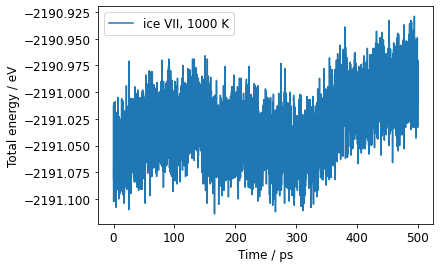

In [16]:
# The Hamiltonian of the system is conserved in the NVE ensemble.
plt.xlabel("Time / ps", fontsize=12)
plt.ylabel("Total energy / eV", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(log1[:, 0]*0.5*1e-3, log1[:, 4], label="ice VII, 1000 K")
plt.legend(fontsize=12)

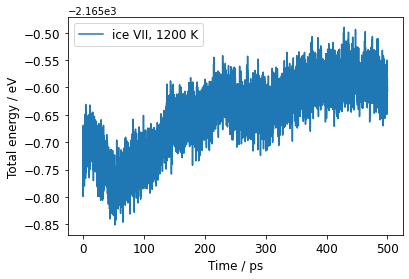

In [18]:
# The Hamiltonian of the system is conserved in the NVE ensemble.
plt.xlabel("Time / ps", fontsize=12)
plt.ylabel("Total energy / eV", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(log2[:, 0]*0.5*1e-3, log2[:, 4], label="ice VII, 1200 K")
plt.legend(fontsize=12)

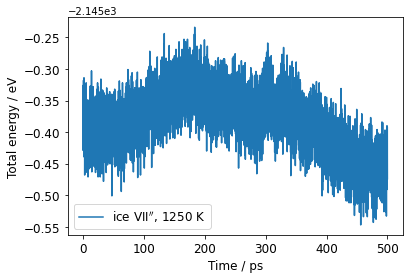

In [19]:
# The Hamiltonian of the system is conserved in the NVE ensemble.
plt.xlabel("Time / ps", fontsize=12)
plt.ylabel("Total energy / eV", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(log3[:, 0]*0.5*1e-3, log3[:, 4], label="ice VII$^{\prime\prime}$, 1250 K")
plt.legend(fontsize=12)

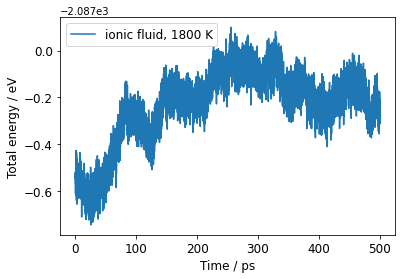

In [20]:
# The Hamiltonian of the system is conserved in the NVE ensemble.
plt.xlabel("Time / ps", fontsize=12)
plt.ylabel("Total energy / eV", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(log4[:, 0]*0.5*1e-3, log4[:, 4], label="ionic fluid, 1800 K")
plt.legend(fontsize=12)

## 1-11 colums of the xyz file:
- 1: atom id
- 2: type
- 3-5: coordinates
- 6-9: velocities
- 10-12: periodic images

In [22]:
print(xyz1[0, :5, :])

[[  1.         1.         1.17284   18.8333     6.09079    3.69655
    5.61175    5.14794    0.        -1.        -1.      ]
 [  2.         2.         1.65389   17.7323     5.01676    3.36145
  -28.8474    13.1691     0.        -1.        -1.      ]
 [  3.         2.         2.02151    2.37895    1.09409   -5.22881
   23.5933   -17.4861     0.         0.         0.      ]
 [  4.         1.         3.99389    4.32258    0.660517  -6.95921
    8.15722   -3.66274    0.         0.         0.      ]
 [  5.         2.         4.37793    3.73443    5.99259    4.26079
   31.7416   -18.0974     0.         0.        -1.      ]]


In [26]:
# unwrap the coordinates
coord1 = xyz1[:, :, 2:5] + xyz1[:, :, 8:11]*cell1
coord2 = xyz2[:, :, 2:5] + xyz2[:, :, 8:11]*cell2
coord3 = xyz3[:, :, 2:5] + xyz3[:, :, 8:11]*cell3
coord4 = xyz4[:, :, 2:5] + xyz4[:, :, 8:11]*cell4

In [27]:
# velocities
vel1 = xyz1[:, :, 5:8]
vel2 = xyz2[:, :, 5:8]
vel3 = xyz3[:, :, 5:8]
vel4 = xyz4[:, :, 5:8]

Now we compute the mean squared displacements. $N_{\mathrm{samp}}$ is the number of samples to compute the ensemble average of $(\bf{r}_i(t)-\bf{r}_i(0))^2$ for a specific $t$, where $t=0.05\times i$ ps, $i = 0, 1, ..., N_{\mathrm{traj}}$.

The diffusion coefficient can be calculated for both the whole system and indivisual elements. In the system of liquid water, both O and H should have similar diffusion coefficients to that of H$_2$O:
$$D_{\mathrm{H}}=D_{\mathrm{H}}=D_{\mathrm{H_2O}}.$$

Note that the only difference should be the number of atoms when doing the average over atoms.

In [46]:
t1 = time()
Nsum = 2000
Ntraj = 200
msd1s = np.zeros([Nsum, Ntraj])
msd1Os = np.zeros([Nsum, Ntraj])
msd1Hs = np.zeros([Nsum, Ntraj])
for i in range(Nsum):
    msd1s[i] = (((coord1[i:i+Ntraj]-coord1[i])**2).sum(axis=2)).mean(axis=1)
    msd1Os[i] = (((coord1[i:i+Ntraj, ::3]-coord1[i, ::3])**2).sum(axis=2)).mean(axis=1)
    msd1Hs[i] = ((((coord1[i:i+Ntraj, 1::3]-coord1[i, 1::3])**2).sum(axis=2)).mean(axis=1) + (((coord1[i:i+Ntraj, 2::3]-coord1[i, 2::3])**2).sum(axis=2)).mean(axis=1))/2
t2 = time()
print("%d means cost %.4f s."%(Nsum, t2-t1))

2000 means cost 6.8500 s.


In [ ]:
msd1_mean = msd1s.mean(axis=0)
msd1O_mean = msd1Os.mean(axis=0)
msd1H_mean = msd1Hs.mean(axis=0)

In [45]:
t1 = time()
Nsum = 2000
Ntraj = 200
msd2s = np.zeros([Nsum, Ntraj])
msd2Os = np.zeros([Nsum, Ntraj])
msd2Hs = np.zeros([Nsum, Ntraj])
for i in range(Nsum):
    msd2s[i] = (((coord2[i:i+Ntraj]-coord2[i])**2).sum(axis=2)).mean(axis=1)
    msd2Os[i] = (((coord2[i:i+Ntraj, ::3]-coord2[i, ::3])**2).sum(axis=2)).mean(axis=1)
    msd2Hs[i] = ((((coord2[i:i+Ntraj, 1::3]-coord2[i, 1::3])**2).sum(axis=2)).mean(axis=1) + (((coord2[i:i+Ntraj, 2::3]-coord2[i, 2::3])**2).sum(axis=2)).mean(axis=1))/2
t2 = time()
print("%d means cost %.4f s."%(Nsum, t2-t1))

2000 means cost 6.5619 s.


In [49]:
msd2_mean = msd2s.mean(axis=0)
msd2O_mean = msd2Os.mean(axis=0)
msd2H_mean = msd2Hs.mean(axis=0)

In [47]:
t1 = time()
Nsum = 2000
Ntraj = 200
msd3s = np.zeros([Nsum, Ntraj])
msd3Os = np.zeros([Nsum, Ntraj])
msd3Hs = np.zeros([Nsum, Ntraj])
for i in range(Nsum):
    msd3s[i] = (((coord3[i:i+Ntraj]-coord3[i])**2).sum(axis=2)).mean(axis=1)
    msd3Os[i] = (((coord3[i:i+Ntraj, ::3]-coord3[i, ::3])**2).sum(axis=2)).mean(axis=1)
    msd3Hs[i] = ((((coord3[i:i+Ntraj, 1::3]-coord3[i, 1::3])**2).sum(axis=2)).mean(axis=1) + (((coord3[i:i+Ntraj, 2::3]-coord3[i, 2::3])**2).sum(axis=2)).mean(axis=1))/2
t2 = time()
print("%d means cost %.4f s."%(Nsum, t2-t1))

2000 means cost 7.0567 s.


In [48]:
msd3_mean = msd3s.mean(axis=0)
msd3O_mean = msd3Os.mean(axis=0)
msd3H_mean = msd3Hs.mean(axis=0)

In [50]:
t1 = time()
Nsum = 2000
Ntraj = 200
msd4s = np.zeros([Nsum, Ntraj])
msd4Os = np.zeros([Nsum, Ntraj])
msd4Hs = np.zeros([Nsum, Ntraj])
for i in range(Nsum):
    msd4s[i] = (((coord4[i:i+Ntraj]-coord4[i])**2).sum(axis=2)).mean(axis=1)
    msd4Os[i] = (((coord4[i:i+Ntraj, ::3]-coord4[i, ::3])**2).sum(axis=2)).mean(axis=1)
    msd4Hs[i] = ((((coord4[i:i+Ntraj, 1::3]-coord4[i, 1::3])**2).sum(axis=2)).mean(axis=1) + (((coord4[i:i+Ntraj, 2::3]-coord4[i, 2::3])**2).sum(axis=2)).mean(axis=1))/2
t2 = time()
print("%d means cost %.4f s."%(Nsum, t2-t1))

2000 means cost 6.9391 s.


In [51]:
msd4_mean = msd4s.mean(axis=0)
msd4O_mean = msd4Os.mean(axis=0)
msd4H_mean = msd4Hs.mean(axis=0)

In [53]:
msd1=(((coord1[:0+Ntraj]-coord1[0])**2).sum(axis=2)).mean(axis=1)
msd2=(((coord2[:0+Ntraj]-coord2[0])**2).sum(axis=2)).mean(axis=1)
msd3=(((coord3[:0+Ntraj]-coord3[0])**2).sum(axis=2)).mean(axis=1)
msd4=(((coord4[:0+Ntraj]-coord4[0])**2).sum(axis=2)).mean(axis=1)

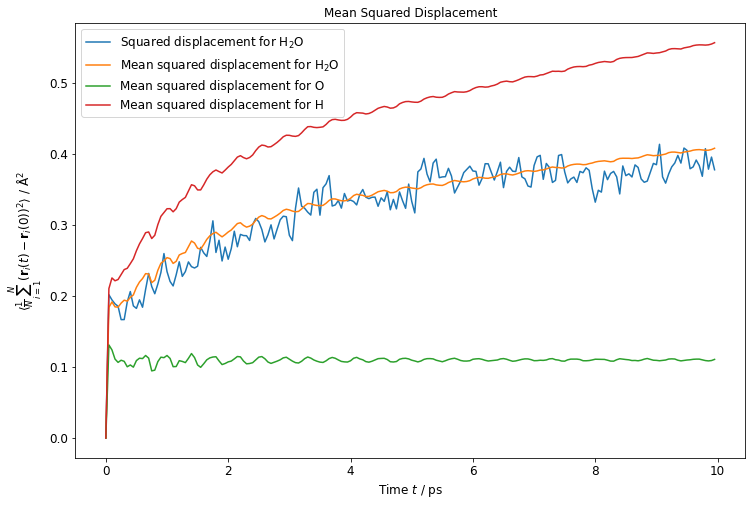

In [43]:
plt.figure(figsize=(12, 8))
plt.title("Mean Squared Displacement", fontsize=12)
plt.xlabel("Time $t$ / ps", fontsize=12)
plt.ylabel("$\langle\\frac{1}{N}\\sum_{i=1}^{N}(\mathbf{r}_i(t)-\mathbf{r}_i(0))^2\\rangle$ / $\mathrm{\AA}^2$", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(0.05*np.arange(Ntraj), msd1, label="Squared displacement for H$_2$O")
plt.plot(0.05*np.arange(Ntraj), msd1_mean, label="Mean squared displacement for H$_2$O")
plt.plot(0.05*np.arange(Ntraj), msd1O_mean, label="Mean squared displacement for O")
plt.plot(0.05*np.arange(Ntraj), msd1H_mean, label="Mean squared displacement for H")
plt.legend(fontsize=12)

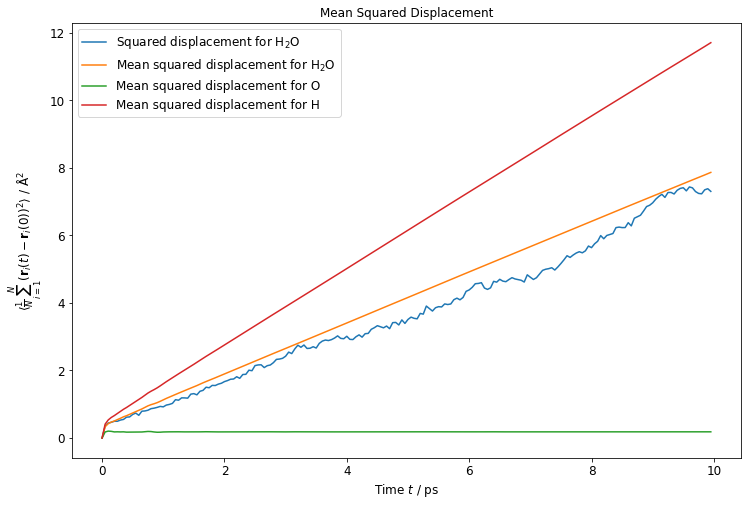

In [54]:
plt.figure(figsize=(12, 8))
plt.title("Mean Squared Displacement", fontsize=12)
plt.xlabel("Time $t$ / ps", fontsize=12)
plt.ylabel("$\langle\\frac{1}{N}\\sum_{i=1}^{N}(\mathbf{r}_i(t)-\mathbf{r}_i(0))^2\\rangle$ / $\mathrm{\AA}^2$", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(0.05*np.arange(Ntraj), msd2, label="Squared displacement for H$_2$O")
plt.plot(0.05*np.arange(Ntraj), msd2_mean, label="Mean squared displacement for H$_2$O")
plt.plot(0.05*np.arange(Ntraj), msd2O_mean, label="Mean squared displacement for O")
plt.plot(0.05*np.arange(Ntraj), msd2H_mean, label="Mean squared displacement for H")
plt.legend(fontsize=12)

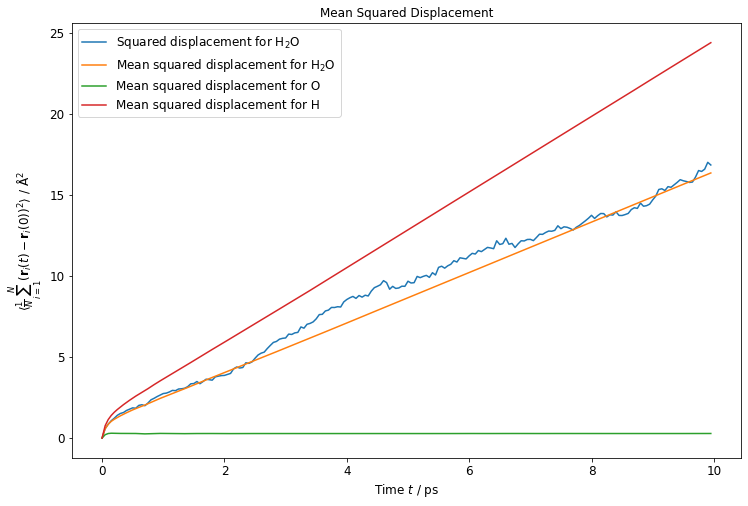

In [55]:
plt.figure(figsize=(12, 8))
plt.title("Mean Squared Displacement", fontsize=12)
plt.xlabel("Time $t$ / ps", fontsize=12)
plt.ylabel("$\langle\\frac{1}{N}\\sum_{i=1}^{N}(\mathbf{r}_i(t)-\mathbf{r}_i(0))^2\\rangle$ / $\mathrm{\AA}^2$", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(0.05*np.arange(Ntraj), msd3, label="Squared displacement for H$_2$O")
plt.plot(0.05*np.arange(Ntraj), msd3_mean, label="Mean squared displacement for H$_2$O")
plt.plot(0.05*np.arange(Ntraj), msd3O_mean, label="Mean squared displacement for O")
plt.plot(0.05*np.arange(Ntraj), msd3H_mean, label="Mean squared displacement for H")
plt.legend(fontsize=12)

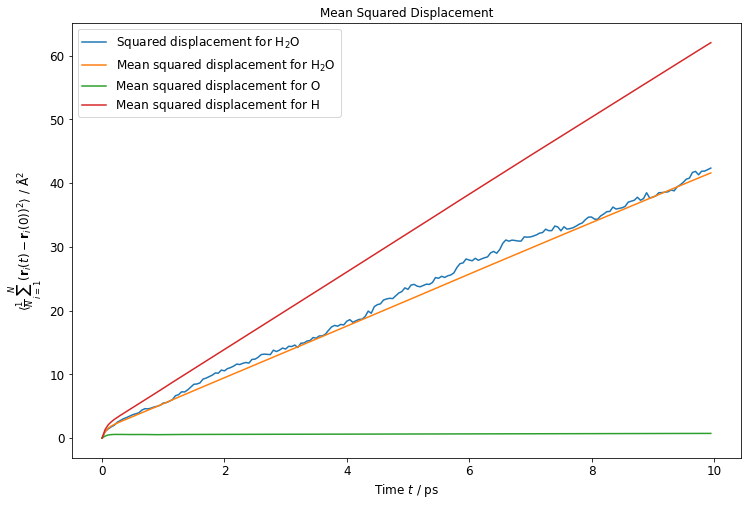

In [56]:
plt.figure(figsize=(12, 8))
plt.title("Mean Squared Displacement", fontsize=12)
plt.xlabel("Time $t$ / ps", fontsize=12)
plt.ylabel("$\langle\\frac{1}{N}\\sum_{i=1}^{N}(\mathbf{r}_i(t)-\mathbf{r}_i(0))^2\\rangle$ / $\mathrm{\AA}^2$", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(0.05*np.arange(Ntraj), msd4, label="Squared displacement for H$_2$O")
plt.plot(0.05*np.arange(Ntraj), msd4_mean, label="Mean squared displacement for H$_2$O")
plt.plot(0.05*np.arange(Ntraj), msd4O_mean, label="Mean squared displacement for O")
plt.plot(0.05*np.arange(Ntraj), msd4H_mean, label="Mean squared displacement for H")
plt.legend(fontsize=12)

Now we perform the linear fitting of the RMSD from 1 to 10 ps.

In [57]:
linefit1 = np.polyfit(0.05*np.arange(20, Ntraj), msd1_mean[20:], deg=1)
linefit1O = np.polyfit(0.05*np.arange(20, Ntraj), msd1O_mean[20:], deg=1)
linefit1H = np.polyfit(0.05*np.arange(20, Ntraj), msd1H_mean[20:], deg=1)

In [58]:
linefit2 = np.polyfit(0.05*np.arange(20, Ntraj), msd2_mean[20:], deg=1)
linefit2O = np.polyfit(0.05*np.arange(20, Ntraj), msd2O_mean[20:], deg=1)
linefit2H = np.polyfit(0.05*np.arange(20, Ntraj), msd2H_mean[20:], deg=1)

In [63]:
linefit3 = np.polyfit(0.05*np.arange(20, Ntraj), msd3_mean[20:], deg=1)
linefit3O = np.polyfit(0.05*np.arange(20, Ntraj), msd3O_mean[20:], deg=1)
linefit3H = np.polyfit(0.05*np.arange(20, Ntraj), msd3H_mean[20:], deg=1)

In [64]:
linefit4 = np.polyfit(0.05*np.arange(20, Ntraj), msd4_mean[20:], deg=1)
linefit4O = np.polyfit(0.05*np.arange(20, Ntraj), msd4O_mean[20:], deg=1)
linefit4H = np.polyfit(0.05*np.arange(20, Ntraj), msd4H_mean[20:], deg=1)

Up to now we have obtained the diffusion coefficients for the 4 systems:

In [59]:
print(linefit1[0]/6, linefit1O[0]/6, linefit1H[0]/6)

0.002569564119096614 2.160820237096185e-05 0.0038435420774594435


In [60]:
print(linefit2[0]/6, linefit2O[0]/6, linefit2H[0]/6)

0.1253814612715269 2.0381472352858714e-05 0.18806200117111393


In [65]:
print(linefit3[0]/6, linefit3O[0]/6, linefit3H[0]/6)

0.2582706862029135 6.523137361237761e-05 0.38737341361756394


In [66]:
print(linefit4[0]/6, linefit4O[0]/6, linefit4H[0]/6)

0.675364276520437 0.0032176006698112617 1.0114376144457498


In [71]:
Temps = np.array([1000, 1200, 1250, 1800])
Ds = np.array([linefit1[0]/6, linefit2[0]/6, linefit3[0]/6, linefit4[0]/6])

In [75]:
DOs = np.array([linefit1O[0]/6, linefit2O[0]/6, linefit3O[0]/6, linefit4O[0]/6])

In [76]:
DHs = np.array([linefit1H[0]/6, linefit2H[0]/6, linefit3H[0]/6, linefit4H[0]/6])

Now we plot the diffusion coefficients as a function of temperature:

Text(1600, 0.3, 'ionic fluid at 1800 K')

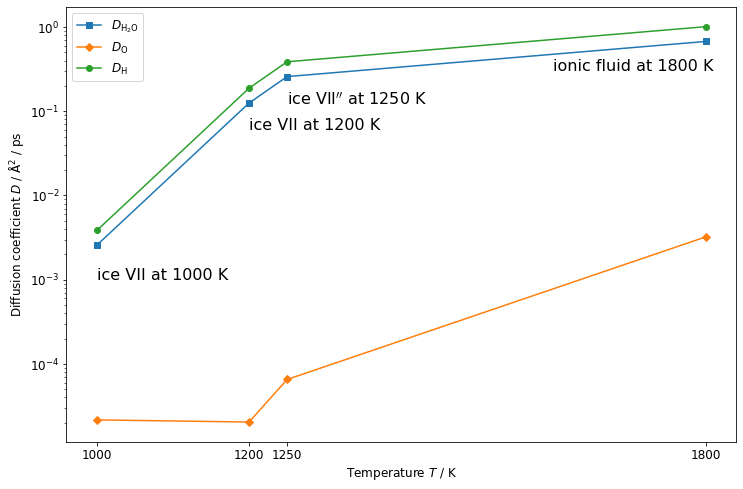

In [116]:
plt.figure(figsize=(12, 8))
plt.xticks(Temps, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Temperature $T$ / K", fontsize=12)
plt.ylabel("Diffusion coefficient $D$ / $\mathrm{\AA^2\ /\ ps}$", fontsize=12)
plt.plot(Temps, Ds, marker="s", label="$D_{\mathrm{H_2O}}$")
plt.plot(Temps, DOs, marker="D", label="$D_{\mathrm{O}}$")
plt.plot(Temps, DHs, marker="o", label="$D_{\mathrm{H}}$")
plt.legend(fontsize=12)
plt.yscale("log")

plt.text(1000, 1e-3, "ice VII at 1000 K", fontsize=16, color="black")
plt.text(1200, 0.6e-1, "ice VII at 1200 K", fontsize=16, color="black")
plt.text(1250, 1.2e-1, "ice VII$^{\prime\prime}$ at 1250 K", fontsize=16, color="black")
plt.text(1600, 0.3e0, "ionic fluid at 1800 K", fontsize=16, color="black")

Note that we omitted the process of computing the statistical error, but it is necessary.

# Method 2: Velocity Auto-correlation Function Approach

In [114]:
t1 = time()
Nsum = 100
Ntraj = 10
vacf = np.zeros(Ntraj)
# msdOs = np.zeros([Nsum, Ntraj])
# msdHs = np.zeros([Nsum, Ntraj])
for i in range(Ntraj):
    vacf[i] = (((vel[:Nsum]*vel[i:i+Nsum]).sum(axis=2)).mean(axis=1)).mean(axis=0)
#     msdOs[i] = (((coord[i:i+Ntraj, ::3]-coord[i, ::3])**2).sum(axis=2)).mean(axis=1)
#     msdHs[i] = ((((coord[i:i+Ntraj, 1::3]-coord[i, 1::3])**2).sum(axis=2)).mean(axis=1) + (((coord[i:i+Ntraj, 2::3]-coord[i, 2::3])**2).sum(axis=2)).mean(axis=1))/2
t2 = time()
print("%d means cost %.4f s."%(Nsum, t2-t1))

100 means cost 0.0149 s.


In [77]:
np.trapz(vacf, 0.05*np.arange(Ntraj))

12.846768187081345